In [1]:
import matplotlib.pyplot as plt
import numpy

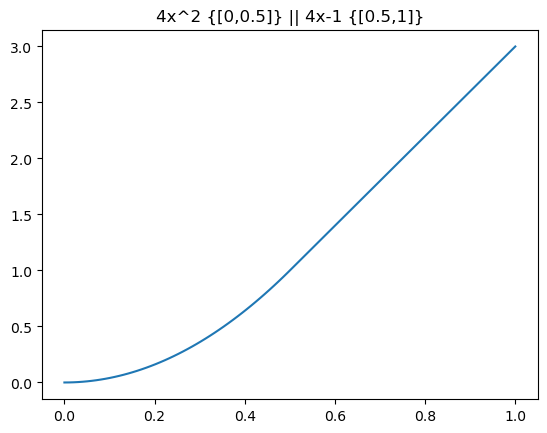

In [2]:
f_desc = "4x^2 {[0,0.5]} || 4x-1 {[0.5,1]}"
def f(x):
    return numpy.where(x < 0.5, 4*numpy.power(x,2), 4*x-1)

xx = numpy.linspace(0,1,100)
yy = f(xx)

plt.plot(xx,yy)
plt.title(f_desc)
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), fontsize="x-small")
    
plt.show()